In [14]:
# 0. 기본 세팅
# 필요 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 0. 기본 세팅
# 폰트 및 한글 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [16]:
# 0. 기본 세팅
# 분석할 csv 파일 불러오기
file_path = "/Users/eon/skRookies/myPython/Python_WebScraping_Analysis/data/인구현황.csv"
df = pd.read_csv(file_path, encoding='utf-8')

In [17]:
# 0. 기본 세팅
# 필터링 - 결괏값에 "전국" 미포함
df = df[df['행정기관'] != '전국']

In [18]:
# 4. 남자초과 / 여자초과 분석
# 성별 초과 판정하는 함수 정의
def 초과구분(ratio):
    if ratio > 1:
        return '남초'
    elif ratio < 1:
        return '여초'
    else:
        return '동일'

In [19]:
# 4. 남자초과 / 여자초과 분석
# "남초여초" 컬럼 생성
df['남초여초'] = df['남여 비율'].apply(초과구분)

In [20]:
# 4. 남자초과 / 여자초과 분석
# 지역별 특정 성별 초과 테이블 추출
gender_excess = (df[['행정기관', '남여 비율', '남초여초']])

In [21]:
# 4. 남자초과 / 여자초과 분석
# 결과 출력
print(gender_excess)

       행정기관  남여 비율 남초여초
1     서울특별시   0.93   여초
2     부산광역시   0.95   여초
3     대구광역시   0.96   여초
4     인천광역시   1.00   동일
5     광주광역시   0.97   여초
6     대전광역시   0.99   여초
7     울산광역시   1.06   남초
8   세종특별자치시   0.99   여초
9       경기도   1.01   남초
10  강원특별자치도   1.01   남초
11     충청북도   1.04   남초
12     충청남도   1.05   남초
13  전북특별자치도   0.99   여초
14     전라남도   1.02   남초
15     경상북도   1.02   남초
16     경상남도   1.02   남초
17  제주특별자치도   1.00   동일


/var/folders/p_/_c9chpr14vxg3hvpscn52m740000gn/T/ipykernel_97579/1031341385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


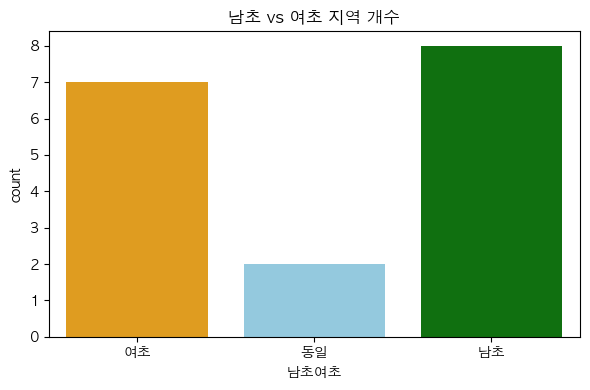

In [22]:
# 5-1. 남초 vs 여초 개수 Plot(seaborn의 countplot), 지역별 세대수 Plot(seaborn의 barplot)
# 남초 vs 여초 개수 Plot(seaborn의 countplot)
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='남초여초',
    palette={
        '남초': 'green',
        '여초': 'orange',
        '동일': 'skyblue'
    })
plt.title('남초 vs 여초 지역 개수')
plt.tight_layout()
plt.show()